## 多元分類問題
* 手寫數字辨識
* labeled data 為 [0, ..., 9]
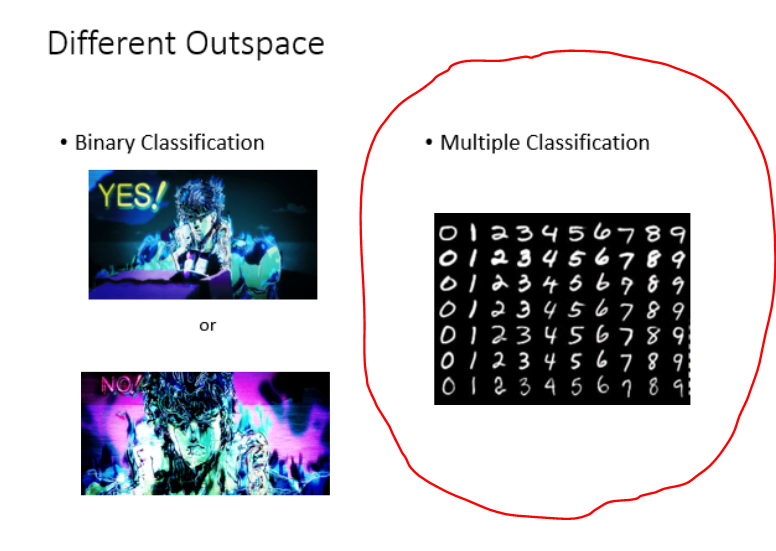

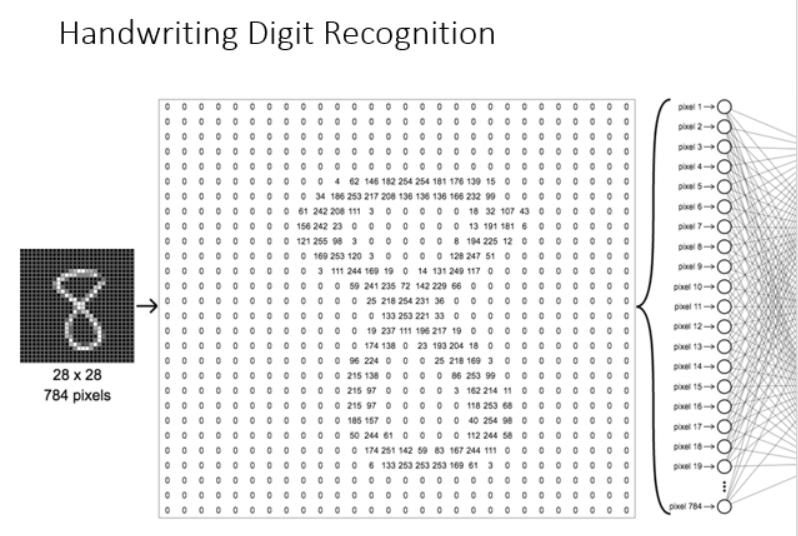

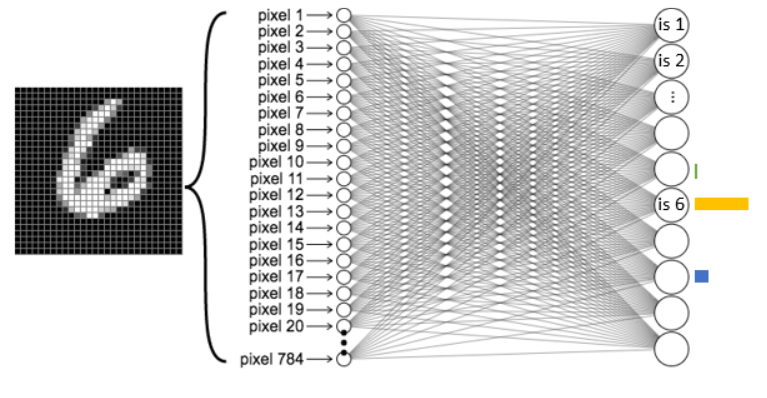

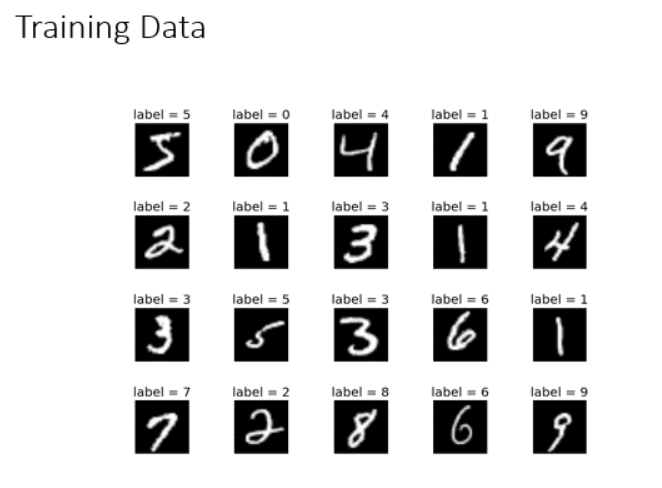

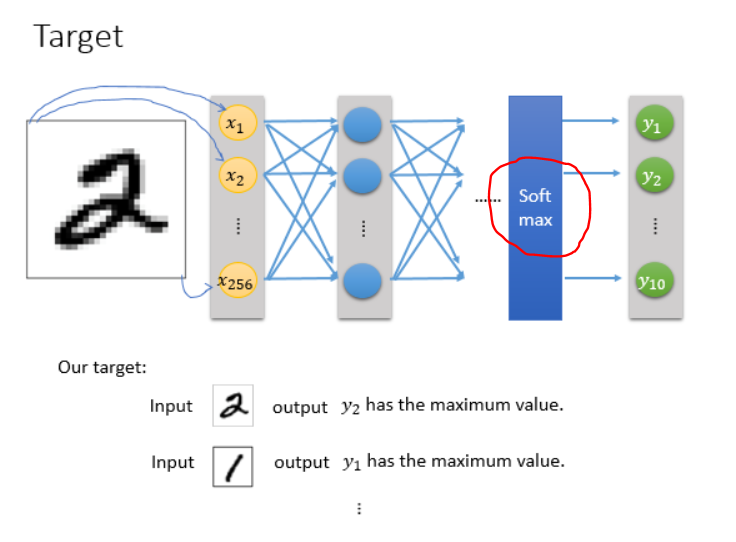

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## download MNIST dataset
* MNIST labeled 手寫數字圖片資料庫

In [2]:
(X_train_org, y_train), (X_test_org, y_test) = mnist.load_data()

* 分成訓練資料(train data) 60000 images and 預測資料(test data) 10000 images 兩組
* 每張圖片大小 28 x 28, 為單色灰階圖片

(60000, 28, 28)
(10000, 28, 28)
y_train[0]:5


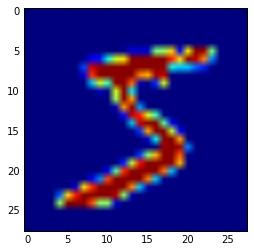

In [3]:
# plotting the first sample
print X_train_org.shape
print X_test_org.shape
print("y_train[0]:%r" % (y_train[0]))
plt.imshow(X_train_org[0])

## 資料前處理
* X: 將 pixel value(0..255) normalize 到 (0..1)
* Y: 將 labeled data 轉換成 vector. ex: 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [4]:
# data pre-processing
X_train = X_train_org.reshape(X_train_org.shape[0], -1) / 255.   # normalize
X_test = X_test_org.reshape(X_test_org.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

## 建立 network(model)
* 使用 2 layers 全連接層
* layer 1 採用 ReLU activation function
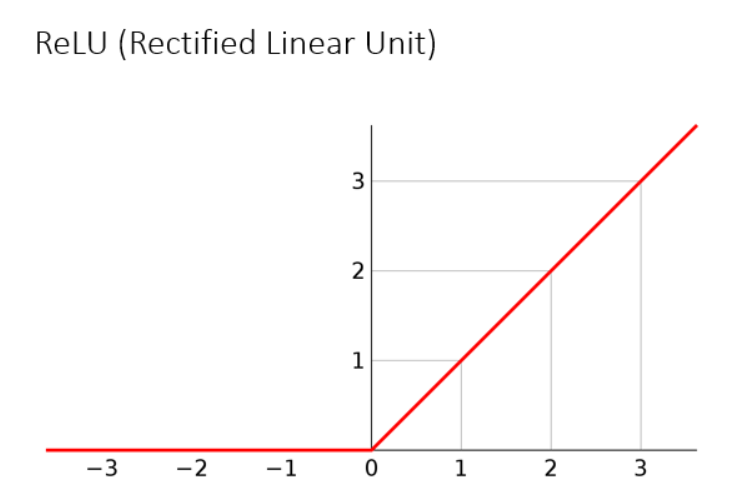

* output layer 採用 softmax activation function
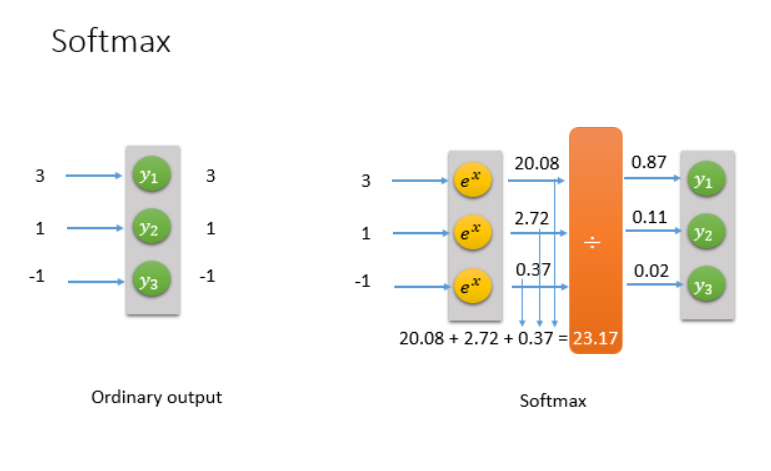

In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


* loss function 採用 'catogorical_crossentropy'
* optimizier 採用 RMSProp
* RMSProp 會根據每個權重的 gradient 來調整 learning rate

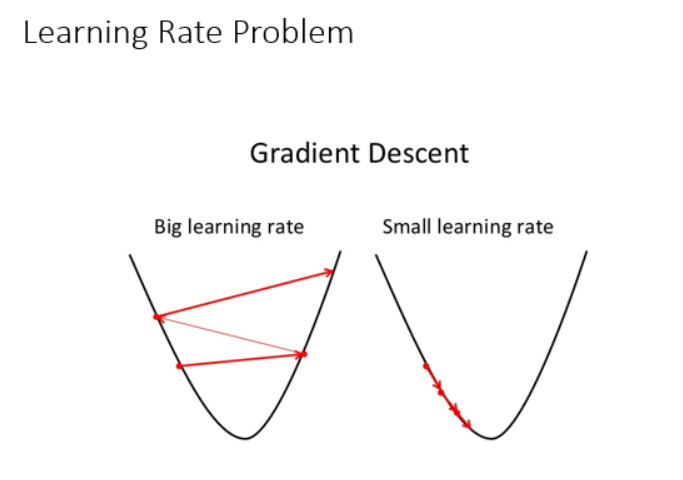

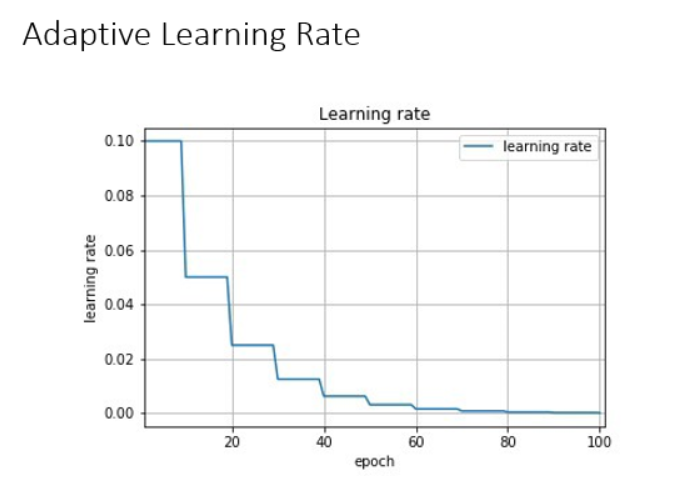

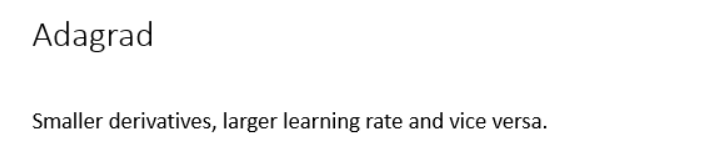

In [6]:
# We add metrics to get more results you want to see
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 訓練
* batch size = 32 (mini-batch)
* epochs = 5, 僅訓練 5 次準確率就達到 96% 

In [7]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Training ------------
Epoch 1/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3433 - acc: 0.9048
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.1949 - acc: 0.9435
Epoch 3/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.1589 - acc: 0.9541
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.1394 - acc: 0.9600
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.1261 - acc: 0.9638


## 預測
* 使用 10000 筆的 test images 測試看看
* 一樣也在 96% 以上

In [8]:
print('Testing ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

Testing ------------
10000/10000 [==============================] - 1s 74us/step
('test loss: ', 0.14030729268472641)
('test accuracy: ', 0.9632)


## 用單張圖片測試看看
* 預測結果第一可能 "7" 機率約 0.999
* 第二可能 "3" 機率約 0.0002668

y_test[0]:array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
predict[0]:array([4.9840905e-09, 2.2337079e-10, 1.4822485e-06, 2.6680733e-04,
       6.8458572e-12, 1.8474029e-06, 3.3668668e-15, 9.9971491e-01,
       1.2147234e-07, 1.4794714e-05], dtype=float32)


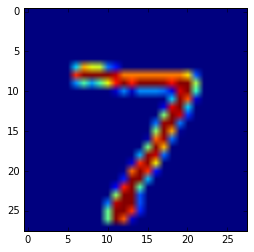

In [9]:
my_test = X_test[0].reshape(1, X_test.shape[1])
predict = model.predict(my_test)

print("y_test[0]:%r" % (y_test[0]))
print("predict[0]:%r" % (predict[0]))
plt.imshow(X_test_org[0])

## [next_part_3](%E5%BE%9E%E9%9B%B6%E9%96%8B%E5%A7%8B%E7%9A%84%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E7%AF%84%E4%BE%8B%E7%AF%87_part_3.ipynb)